In [162]:
# import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from PIL import Image
import cv2

In [163]:
df = pd.read_json("photos.json", lines=True)

In [165]:
labels = df.label.unique().tolist()
labels

['inside', 'outside', 'drink', 'food', 'menu']

In [166]:
sample_df = pd.DataFrame()

for label in labels:
    label_df = df[df["label"] == label].sample(200, random_state=42)
    sample_df = sample_df.append(label_df, ignore_index=True)

C:\Users\Katrin\AppData\Local\Temp\ipykernel_19232\3964460357.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(label_df, ignore_index=True)


In [168]:
import os

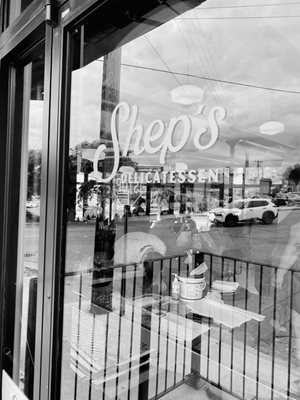

In [169]:
directory = "C:/Users/Katrin/Downloads/yelp_photos/photos/"
from PIL import ImageOps
img = Image.open(directory + sample_df.photo_id.iloc[300] + ".jpg")
img = ImageOps.grayscale(img)
img

### Create an array of images in numpy array format

In [ ]:
img = ImageOps.autocontrast(img)
img = ImageOps.equalize(img)

In [415]:
sample_images = []

for i in range(0,1000):
    img = cv2.imread(directory + sample_df.photo_id.iloc[i] + ".jpg",0)
    # img = np.array(img)
    # img = cv2.resize(img,(224,224))
    img = cv2.equalizeHist(img)
    # img = cv2.blur(img, (3,3))
    # img = cv2.GaussianBlur(img, (3,3),0)
    sample_images.append(img)

In [416]:
sample_df["np_image"] = sample_images
sample_df = sample_df[["photo_id", "label", "np_image"]]
sample_df.head()

,photo_id,label,np_image
0,cO58-hmFkBxDUQ4B0p40AA,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,..."
1,7_hiXIbS5Ub0_eiRxr5COg,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,XseBUNM81RxxtfDgyjxXiA,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ..."
3,_IRUZoGYSr9bICvBJrPnhw,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,..."
4,x8xVVzTI3yW5xZraRZNxfQ,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7..."


### Get descriptors for each image in sample_images

In [448]:
descriptors = []
keypoints = []

orb = cv2.ORB_create(nfeatures=50)

for img in sample_images:
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    descriptors.append(des)
    keypoints.append(kp)

In [449]:
# for i in range (sample_df.shape[0]):
#     sample_df["descriptors"][i] = sample_df["descriptors"][i].flatten()

In [450]:
# sample_df["descriptors"] = sample_df["descriptors"].apply(lambda x : np.concatenate(x))

In [459]:
desc = []
for i in range (sample_df.shape[0]):
    desc.append(np.concatenate(descriptors[i])[:1000])

In [460]:
np.unique(list(map(len, desc)))

array([1000])

In [461]:
sample_df["keypoints"] = keypoints
sample_df["descriptors"] = desc

In [462]:
# desc = np.concatenate(descriptors, axis=0)
# print()
# print("Shape of all_descriptors : ", all_descriptors.shape)

In [463]:
from sklearn import cluster

PCA

In [464]:
from sklearn.decomposition import PCA

In [465]:
len(desc[1])

1000

In [466]:
pca = PCA(n_components=0.90, random_state=42)
feat_pca = pca.fit_transform(desc)
print("Dimension after PCA reduction : ", feat_pca.shape)

Dimension after PCA reduction :  (1000, 435)


In [467]:
from sklearn.cluster import KMeans

In [468]:
kmeans = KMeans(n_clusters = 5)

In [469]:
label = kmeans.fit_predict(feat_pca)

In [470]:
sample_df["kmeans_label"] = label

In [471]:
sample_df.head(5)

,photo_id,label,np_image,keypoints,descriptors,kmeans_label
0,cO58-hmFkBxDUQ4B0p40AA,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","(< cv2.KeyPoint 000001DC66E2B060>, < cv2.KeyPo...","[1, 249, 27, 115, 32, 143, 97, 148, 126, 137, ...",2
1,7_hiXIbS5Ub0_eiRxr5COg,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(< cv2.KeyPoint 000001DC66E2B420>, < cv2.KeyPo...","[5, 176, 157, 209, 236, 253, 176, 154, 94, 249...",0
2,XseBUNM81RxxtfDgyjxXiA,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","(< cv2.KeyPoint 000001DC66E38240>, < cv2.KeyPo...","[89, 25, 18, 118, 83, 252, 118, 81, 169, 64, 1...",3
3,_IRUZoGYSr9bICvBJrPnhw,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","(< cv2.KeyPoint 000001DC66E38BA0>, < cv2.KeyPo...","[205, 254, 141, 63, 248, 236, 39, 255, 190, 21...",1
4,x8xVVzTI3yW5xZraRZNxfQ,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","(< cv2.KeyPoint 000001DC66E39500>, < cv2.KeyPo...","[170, 89, 228, 87, 205, 81, 148, 103, 207, 246...",2


In [472]:
print(label)

[2 0 3 1 2 3 0 2 3 4 3 3 1 4 0 2 4 2 2 2 2 3 1 3 3 3 2 3 4 2 4 1 4 1 1 3 2
 3 3 1 1 2 3 2 1 3 1 2 2 2 2 3 0 1 2 3 0 4 2 0 3 3 1 1 3 2 4 2 1 3 1 1 1 3
 1 4 0 1 1 2 2 0 2 2 4 1 1 4 0 4 4 2 1 3 1 4 0 2 1 1 1 1 2 4 1 0 2 0 3 1 4
 3 4 0 1 3 1 2 0 0 0 1 1 3 0 4 1 3 4 2 3 3 1 1 3 1 3 3 3 1 2 3 2 0 4 4 1 4
 1 3 2 0 2 3 3 3 2 0 2 4 1 4 1 3 3 2 1 3 4 2 1 4 4 3 2 2 3 0 1 4 4 3 1 0 4
 2 3 2 0 1 2 1 0 4 0 1 3 2 3 2 1 2 0 2 4 1 2 1 3 2 4 1 4 2 1 4 4 4 1 2 2 0
 2 3 0 1 4 2 2 0 1 3 2 2 3 3 2 1 2 3 1 2 1 1 1 2 2 4 2 2 3 2 3 2 3 1 0 2 2
 4 3 4 2 4 0 1 4 4 2 2 4 4 1 3 4 4 2 3 2 2 3 0 2 3 3 0 2 2 0 4 3 3 1 0 1 0
 3 2 4 1 2 3 1 1 0 0 3 2 1 4 0 1 0 0 4 1 0 1 3 2 1 1 2 3 2 3 1 2 2 2 1 3 2
 3 3 2 3 1 2 2 2 3 4 1 2 1 1 4 2 4 2 2 3 3 2 1 3 2 1 3 2 1 3 3 2 0 1 1 0 0
 0 0 0 1 0 0 1 3 3 2 4 1 2 4 2 3 1 1 1 0 3 1 0 3 1 4 2 1 2 1 2 1 3 3 1 2 3
 3 4 3 3 2 4 3 4 4 0 0 0 1 2 1 3 1 4 2 3 4 3 4 4 1 1 4 4 2 2 2 1 2 2 0 4 2
 2 2 2 0 4 1 4 0 2 4 0 4 1 0 2 3 4 4 3 4 4 4 2 3 2 4 4 0 3 4 4 3 2 0 4 2 1
 2 2 0 2 1 2 3 1 4 4 1 2 

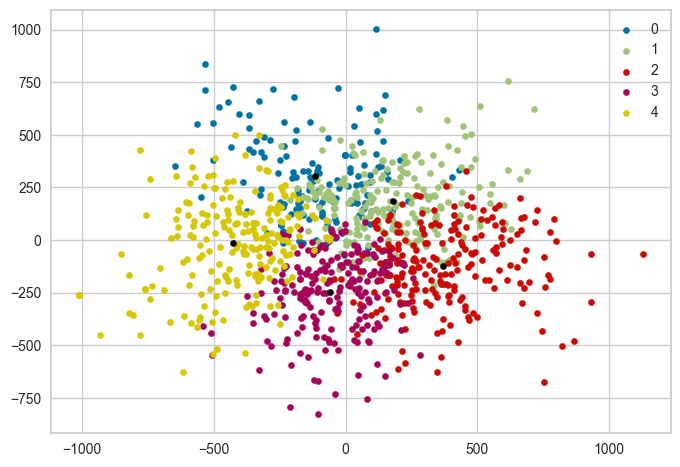

In [473]:
#Getting the Centroids

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(feat_pca[label == i , 0] , feat_pca[label == i , 1] , s=20, label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'black')
plt.legend()
plt.show()

In [474]:
from yellowbrick.cluster import InterclusterDistance

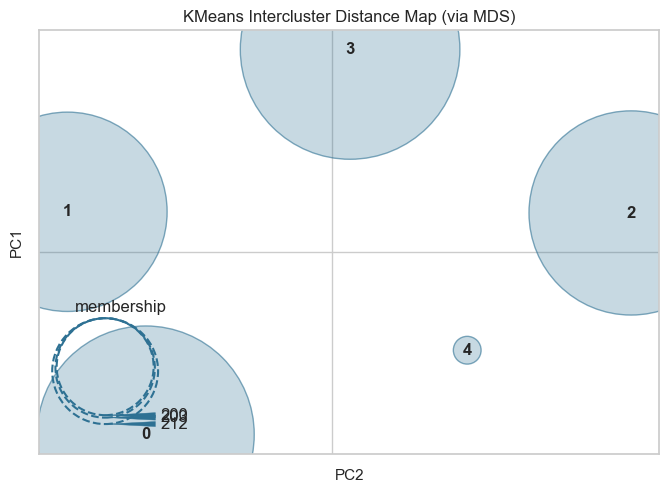

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [475]:
visualizer = InterclusterDistance(KMeans(5))
visualizer.fit(desc)
visualizer.show()

In [476]:
from sklearn.metrics import silhouette_score

silhouette_score(desc, label)

0.005905419559919098

In [477]:
sample_df.kmeans_label.value_counts()

2    225
4    217
1    210
3    207
0    141
Name: kmeans_label, dtype: int64

In [478]:
sample_df.groupby(by=sample_df.label).kmeans_label.value_counts()

label    kmeans_label
drink    4               51
         2               46
         3               42
         1               33
         0               28
food     3               48
         4               44
         2               40
         1               38
         0               30
inside   1               50
         3               48
         2               46
         4               31
         0               25
menu     4               64
         1               41
         2               34
         0               31
         3               30
outside  2               59
         1               48
         3               39
         0               27
         4               27
Name: kmeans_label, dtype: int64

drink = 4  
food = 3  
inside = 1  
menu = 0  
outside = 2  

In [480]:
label_names = {'menu':0, 'inside':1, 'outside':2, 'food':3, 'drink':4}

In [485]:
sample_df["true_label"] = sample_df["label"].map(label_names)
sample_df

,photo_id,label,np_image,keypoints,descriptors,kmeans_label,true_label
0,cO58-hmFkBxDUQ4B0p40AA,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","(< cv2.KeyPoint 000001DC66E2B060>, < cv2.KeyPo...","[1, 249, 27, 115, 32, 143, 97, 148, 126, 137, ...",2,1
1,7_hiXIbS5Ub0_eiRxr5COg,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(< cv2.KeyPoint 000001DC66E2B420>, < cv2.KeyPo...","[5, 176, 157, 209, 236, 253, 176, 154, 94, 249...",0,1
2,XseBUNM81RxxtfDgyjxXiA,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","(< cv2.KeyPoint 000001DC66E38240>, < cv2.KeyPo...","[89, 25, 18, 118, 83, 252, 118, 81, 169, 64, 1...",3,1
3,_IRUZoGYSr9bICvBJrPnhw,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","(< cv2.KeyPoint 000001DC66E38BA0>, < cv2.KeyPo...","[205, 254, 141, 63, 248, 236, 39, 255, 190, 21...",1,1
4,x8xVVzTI3yW5xZraRZNxfQ,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","(< cv2.KeyPoint 000001DC66E39500>, < cv2.KeyPo...","[170, 89, 228, 87, 205, 81, 148, 103, 207, 246...",2,1
...,...,...,...,...,...,...,...
995,FYcHZXujQX0GGs1oevYfdQ,menu,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...","(< cv2.KeyPoint 000001DC670EA850>, < cv2.KeyPo...","[44, 177, 122, 90, 253, 205, 117, 253, 239, 93...",4,0
996,PP2dCAxKLHMzqNAQfoeerw,menu,"[[217, 255, 255, 219, 219, 255, 212, 255, 255,...","(< cv2.KeyPoint 000001DC670EB1B0>, < cv2.KeyPo...","[33, 156, 43, 191, 84, 167, 235, 98, 86, 73, 8...",4,0
997,WiRnjbxlRNGBrCzYDhybWA,menu,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...","(< cv2.KeyPoint 000001DC670EBB10>, < cv2.KeyPo...","[108, 169, 145, 247, 13, 72, 66, 152, 18, 184,...",2,0
998,Wc-r1NIkj8VvpajjOFa1YA,menu,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","(< cv2.KeyPoint 000001DC670EC4B0>, < cv2.KeyPo...","[26, 146, 247, 105, 51, 62, 176, 87, 45, 21, 1...",1,0


In [487]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(sample_df.true_label, sample_df.kmeans_label)

0.006571412812836872